# SatNav assignment 2021

### Gavin Furtado student no- 21200745

### Applications of space science

In this assignment we are given the data from four satellites and have to find the location that is longitude and latitude from this data. The latitude, longitude and time of flight of each satellite is stored in a tuple as these values should not be changed.

In [21]:
# the satellite data is in the following order (latitude,longitude,time of flight in seconds{includes unknown error})

sat_1 = (44.755999110991134, 12.673381463006782, 0.069447059769816)
sat_2 = (16.681499169991120, -4.299466594261800, 0.073842846382422)
sat_3 = (37.280445425901767, -70.085962990338899, 0.076533194500957)
sat_4 = (89.512513358850271, -18.613041510625294, 0.073670581539742)

speed_of_light = 299792458 #m/s
radius_of_earth = 6371000 #m/s

The altitude is converted to meters and pseudoranges are obtained from multiply time of flight with speed of light.

The next step is to convert the spherical coordinates into cartesian, a function is created to do this process which have the conversion formula. Numpy library is used to do the numerical calculations and the corresponding values are printed in the output.

In [22]:
import numpy as np

ALT = 20200000 #meters
d1 = sat_1[2]*speed_of_light
d2 = sat_2[2]*speed_of_light
d3 = sat_3[2]*speed_of_light
d4 = sat_4[2]*speed_of_light
r = ALT + radius_of_earth
print(r)
def spher_to_cart(lat, long):
    lat = np.radians(lat)
    long = np.radians(long)
    print(f'Latitude in radians {lat}, Longitude in radians{long}')
    x = r*np.cos(lat)*np.cos(long)
    y = r*np.cos(lat)*np.sin(long)
    z = r*np.sin(lat)
    return x, y, z

x1, y1, z1 = spher_to_cart( sat_1[0], sat_1[1])
x2, y2, z2 = spher_to_cart( sat_2[0], sat_2[1])
x3, y3, z3 = spher_to_cart( sat_3[0], sat_3[1])
x4, y4, z4 = spher_to_cart( sat_4[0], sat_4[1])

print()
print(f'The cartesian coordinates are of satellite 1 are x1={x1}, y1={y1}, z1={z1}')
print(f'The cartesian coordinates are of satellite 2 are x2={x2}, y2={y2}, z2={z2}')
print(f'The cartesian coordinates are of satellite 3 are x3={x3}, y3={y3}, z3={z3}')
print(f'The cartesian coordinates are of satellite 4 are x4={x4}, y4={y4}, z4={z4}')

26571000
Latitude in radians 0.7811395445064503, Longitude in radians0.2211922338906843
Latitude in radians 0.2911470846850463, Longitude in radians-0.07503984814937555
Latitude in radians 0.6506665192920456, Longitude in radians-1.2232308136123045
Latitude in radians 1.5622880798473457, Longitude in radians-0.3248588581707905

The cartesian coordinates are of satellite 1 are x1=18408678.591701575, y1=4139589.161032022, z1=18708350.94510722
The cartesian coordinates are of satellite 2 are x2=25381137.304471068, y2=-1908179.6742205143, z2=7627238.062528205
The cartesian coordinates are of satellite 3 are x3=7201181.387369585, y3=-19877826.762174897, z3=16094503.124954347
The cartesian coordinates are of satellite 4 are x4=214245.49326885244, y4=-72155.8676689894, z4=26570038.264921166


Now we have four equations with four unknowns x,y,z and b by rearranging the terms we can get the following equation 

fk(x, y, z, b) = (x − xk)^2 + (y − yk)^2 + (z − zk)^2 − (dk − b)^2 = 0, k = 1,2,3,4

eg. f1 = (x-x1)^2 + (y-y1)^2 + (z-z1)^2 - (d1-b)^2 = 0

A multi dimenional array is made to store these equations, now we need to solve this system of non-linear equations. We will use the Newton's method but for that a jacobian matrix is required which is simply the partial derivative of the four equations. The jacobian matrix is a four by four matrix.

In [23]:
def function(var):
    b,x,y,z = var
    return np.array([[-(d1-b)**2 + (x-x1)**2 + (y-y1)**2 + (z-z1)**2],
                     [-(d2-b)**2 + (x-x2)**2 + (y-y2)**2 + (z-z2)**2],
                     [-(d3-b)**2 + (x-x3)**2 + (y-y3)**2 + (z-z3)**2],
                     [-(d4-b)**2 + (x-x4)**2 + (y-y4)**2 + (z-z4)**2]])

def jacobian(var):
    b,x,y,z = var
    return np.array([[2*(d1-b) , 2*(x-x1) , 2*(y-y1) , 2*(z-z1)],
                     [2*(d2-b) , 2*(x-x2) , 2*(y-y2) , 2*(z-z2)],
                     [2*(d3-b) , 2*(x-x3) , 2*(y-y3) , 2*(z-z3)],
                     [2*(d4-b) , 2*(x-x4) , 2*(y-y4) , 2*(z-z4)]])

The formula for Newtons method is,

Xn+1 = Xn -  J^-1(Xn) F(Xn)

Where J^-1 is the inverse of jacobian matrix. The for iterative loop runs till the difference between Xn+1 and Xn is small, only then the loop willl be converged and break.

In [24]:
#xn = np.array([[0.1],[12090067],[-1270717],[16132437]])
#xn = np.array([[6462434.32322254],[3538986.04745411],[-547073.09304276],[4879299.41097825]])
xn = np.array([[0.1],[1],[-1],[1]])
F = function([xn[0,0],xn[1,0],xn[2,0],xn[3,0]])
J = jacobian([xn[0,0],xn[1,0],xn[2,0],xn[3,0]])
J_inv = np.linalg.inv(J)

for i in range(1,10):
    Xn1= np.subtract(xn,np.matmul(J_inv,F)) #Newtons method
    #print(np.matmul(J_inv,F))
    #print(xn)
    #print(xn-Xn1)
    print(Xn1)
    F = function([ Xn1[0,0],Xn1[1,0],Xn1[2,0],Xn1[3,0] ])  # Updating the input pararmeters for F matrix
    J = jacobian([ Xn1[0,0],Xn1[1,0],Xn1[2,0],Xn1[3,0] ])  # Updating the input parameters for J matrix
    J_inv =np.linalg.inv(J)                                # Finding inverse of jacobian
    difference = xn - Xn1                                  # Difference between the previous values and current output
    xn[0,0] = Xn1[0,0]
    xn[1,0] = Xn1[1,0]
    xn[2,0] = Xn1[2,0]
    xn[3,0] = Xn1[3,0]
    tol=np.array([[1e-7],[1e-7],[1e-7],[1e-7]])
    if (difference<tol).all() == True:
        print('converged')
        break



[[1041825.65200952]
 [3647777.27048295]
 [-396741.35489069]
 [4942234.94479071]]
[[ 326101.23313883]
 [3777006.17388012]
 [-412805.15258178]
 [5117433.22423265]]
[[ 334913.9545725 ]
 [3775414.97718933]
 [-412607.35889124]
 [5115276.0061866 ]]
[[ 334915.29107621]
 [3775414.73587451]
 [-412607.3288946 ]
 [5115275.67903115]]
[[ 334915.29107624]
 [3775414.73587451]
 [-412607.3288946 ]
 [5115275.67903114]]
converged


In [25]:
import math
distance = np.sqrt(xn[1]**2 + xn[2]**2 + xn[3]**2)
#Latitude = np.degrees(math.atan((np.sqrt(xn[1]**2 + xn[2]**2))/xn[3]))
Latitude = np.degrees(math.asin(xn[3]/6371000))
Longitude = np.degrees(math.atan(xn[2]/xn[1]))
elevation = distance - radius_of_earth
clock_offset = xn[0,0]/speed_of_light

print(f'LATITUDE = {Latitude} degrees, LONGITUDE = {Longitude} degrees')
print()
print(f'Distance from the center of the earth is {distance[0]} meters,  {distance[0]/1000} kilometers')
print()
print(f'Elevation is {elevation[0]} meters')
print()
print(f'The receiver clock offset is {clock_offset} seconds')

LATITUDE = 53.40792784161295 degrees, LONGITUDE = -6.236985544383631 degrees

Distance from the center of the earth is 6371031.824453825 meters,  6371.031824453825 kilometers

Elevation is 31.82445382513106 meters

The receiver clock offset is 0.0011171571603587253 seconds


The Map shown below gives the exact location of the GPS receiver.

The red pin shows the location (53.40792784161295,-6.236985544383631)
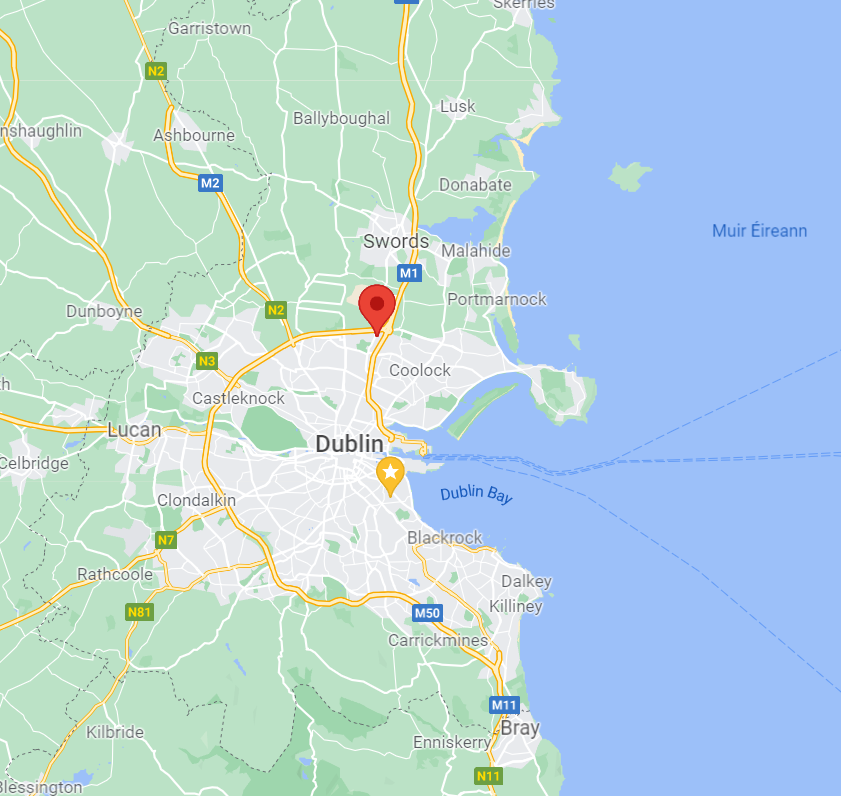

Zoomed out
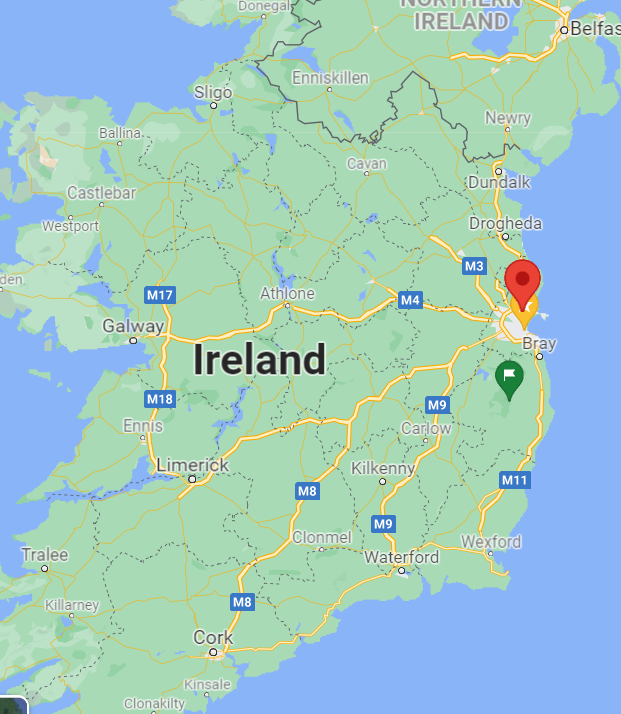

#### Conclusion
In the newtons method results obtained above, the change in intial guess does not change the output latitude, longitude and elevation values by much and also it gets converged quickly.